In [ ]:
import torch
from PIL import Image
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
# 미리 학습된 Faster R-CNN 모델 로드
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # 모델을 평가 모드로 전환

# 이미지를 로드하고 변환
image_path = '/content/drive/MyDrive/IMG_7485.jpeg'  # 탐지할 이미지 경로
image = Image.open(image_path).convert("RGB")
transform = T.Compose([T.ToTensor()])  # 이미지를 텐서로 변환
image_tensor = transform(image).unsqueeze(0)  # 배치 차원을 추가

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


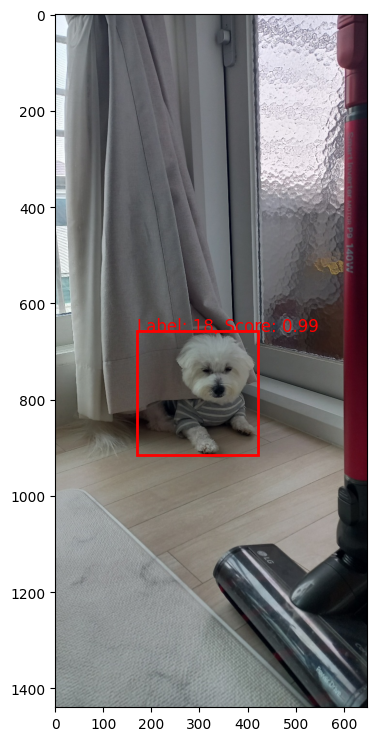

In [ ]:
# 객체 탐지 수행
with torch.no_grad():
    predictions = model(image_tensor)

# 탐지된 객체의 박스와 레이블 그리기 (특정 클래스만 필터링)
target_class_id = 18  # COCO에서 강아지(개)의 클래스 ID
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for i in range(len(predictions[0]['boxes'])):
    label = predictions[0]['labels'][i].item()
    score = predictions[0]['scores'][i].item()
    if score > 0.5 and label == target_class_id:  # 신뢰도 기준과 특정 클래스 필터링
        box = predictions[0]['boxes'][i].numpy()
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin, f'Label: {label}, Score: {score:.2f}', color='red', fontsize=12)

plt.show()
